<a href="https://colab.research.google.com/github/23ME30056/CRACK-DETECTION-USING-CRANET/blob/main/self_supervised_learning_cranet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install torch torchvision
# !pip install lightly

   ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 216.1/363.4 MB 75.1 MB/s eta 0:00:02ERROR: Operation cancelled by user
Traceback (most recent call last):
  File 
"/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", 
line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File 
"/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line
67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File 
"/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", 
line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File 
"/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/res
olver.py", line 179, in resolve
    self.factory.preparer.prepare_linked_requirements_more(reqs)
  File 
"/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/prepare.py", 
line 554, in prepare_linked_requiremen

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
source_dirs = ['/content/drive/MyDrive/CRANET research (1)/CRANET research/Dataset/Concrete Crack Images for Classification/Positive', '/content/drive/MyDrive/CRANET research (1)/CRANET research/Dataset/Concrete Crack Images for Classification/Negative']
destination_dir = '/content/drive/MyDrive/CRANET research (1)/CRANET research/Dataset/Concrete Crack Images for Classification/Unlabelled'

In [ ]:
import os

def count_images(folder):
    return sum(
        1 for filename in os.listdir(folder)
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))
    )

positive_count = count_images(source_dirs[0])
negative_count = count_images(source_dirs[1])

print(f"🟢 Number of positive images: {positive_count}")
print(f"🔴 Number of negative images: {negative_count}")

In [ ]:
# import os
# import shutil
# os.makedirs(destination_dir, exist_ok=True)

# # Counter for renaming files uniquely
# counter = 0

# # Loop through each source folder
# for folder in source_dirs:
#     for filename in os.listdir(folder):
#         src_path = os.path.join(folder, filename)

#         # Skip non-image files (just in case)
#         if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
#             continue

#         # Give a new unique name: crack_ or noncrack_ based on original folder
#         label = 'crack' if folder == source_dirs[0] else 'noncrack'
#         new_filename = f"{label}_{counter:05d}{os.path.splitext(filename)[1]}"
#         dst_path = os.path.join(destination_dir, new_filename)

#         shutil.copy(src_path, dst_path)
#         counter += 1

# print(f"✅ Merged {counter} images into '{destination_dir}/'")

In [ ]:
source_zip = "/content/drive/MyDrive/CRANET research (1)/CRANET research/5y9wdsg2zt-2.zip"

In [ ]:
!unzip -o "/content/drive/MyDrive/CRANET research (1)/CRANET research/5y9wdsg2zt-2.zip" \
-d "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped"

In [ ]:
!ls /content/crack_data

In [ ]:
!apt-get install unrar -y

In [ ]:
source_rar = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/Concrete Crack Images for Classification.rar"

In [ ]:
!unrar x \
"/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/Concrete Crack Images for Classification.rar" \
"/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/extracted/"


In [ ]:
source_dirs = ["/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/extracted/Positive","/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/extracted/Negative"]

In [ ]:
import os
import shutil

# Paths to the extracted folders
positive_dir = source_dirs[0]
negative_dir = source_dirs[1]
destination_dir = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/unlabelled"

# Make the output directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Labels for renaming
source_dirs = [positive_dir, negative_dir]
labels = {positive_dir: 'crack', negative_dir: 'noncrack'}

# Start copying and renaming files
counter = 0
for folder in source_dirs:
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
            src_path = os.path.join(folder, filename)
            ext = os.path.splitext(filename)[1]
            label = labels[folder]
            new_filename = f"{label}_{counter:05d}{ext}"
            dst_path = os.path.join(destination_dir, new_filename)

            shutil.copy(src_path, dst_path)
            counter += 1

print(f"✅ Merged {counter} images into: {destination_dir}")

NameError: name 'source_dirs' is not defined

In [ ]:
# # CBAM attention network
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
# from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Concatenate, multiply, Reshape
# from tensorflow.keras.layers import Add, Lambda, GlobalMaxPooling2D, Activation,MaxPooling2D
# from tensorflow.keras.models import Sequential, Model, load_model

# def channel_attention_layers(input_f, channel, ratio=16):
#     """
#     This channel module contains two main pooling feature, i.e.,
#     max polling and average pooing, this enable the channel module
#     to focus on the attention.
#     """
#     layer_1 = Dense(channel//ratio, activation='relu')
#     layer_2 = Dense(channel)

#     #average pool
#     avg_pooling = GlobalAveragePooling2D()(input_f)
#     avg_pooling = layer_1(avg_pooling)
#     avg_pooling = layer_2(avg_pooling)

#     #max pool feature for more concenetrated channel feature
#     max_pooling = GlobalMaxPooling2D()(input_f)
#     max_pooling = layer_1(max_pooling)
#     max_pooling = layer_2(max_pooling)

#     # adding both the max and average pool in an alignment
#     cbam_feature = Add()([avg_pooling,max_pooling])
#     cbam_feature = Activation('sigmoid')(cbam_feature)
#     return multiply([input_f, cbam_feature])



# def spatial_attention_layers(input_f,kernel_size):
#     avg_pooling = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(input_f)
#     max_pooling = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(input_f)
#     concat = Concatenate(axis=3)([avg_pooling, max_pooling])
#     cbam_feature = Conv2D(filters = 1,kernel_size=kernel_size,strides=1,padding='same',activation='sigmoid',use_bias=False)(concat)
#     return multiply([input_f, cbam_feature])

# def cbam_block1(cbam_f, channel, ratio = 16, kernel_size = 3):

#     """
#     In the paper provided details says that, kernel size = 3,
#     since the kernel in vgg16 is 3;
#     this also depdends on the convolutional kernel size.
#     """
#     cbam_f = channel_attention_layers(cbam_f, channel, ratio)
#     cbam_f = spatial_attention_layers(cbam_f, kernel_size)
#     return cbam_f

In [37]:
from tensorflow.keras.layers import (
    GlobalAveragePooling2D, GlobalMaxPooling2D, Dense, Reshape,
    Add, Activation, Multiply, Concatenate, Conv2D, Layer
)
from tensorflow.keras import backend as K
from tensorflow.keras.utils import register_keras_serializable
import tensorflow as tf

In [38]:
@register_keras_serializable()
class ChannelMean(Layer):
    def call(self, x):
        return tf.reduce_mean(x, axis=3, keepdims=True)

@register_keras_serializable()
class ChannelMax(Layer):
    def call(self, x):
        return tf.reduce_max(x, axis=3, keepdims=True)

In [39]:
def cbam_block1(input_feature, channel, ratio=8):
    # ---- Channel Attention ----
    shared_dense_one = Dense(channel // ratio, activation='relu', kernel_initializer='he_normal', use_bias=True)
    shared_dense_two = Dense(channel, kernel_initializer='he_normal', use_bias=True)

    # Average Pooling
    avg_pool = GlobalAveragePooling2D()(input_feature)
    avg_pool = Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_dense_one(avg_pool)
    avg_pool = shared_dense_two(avg_pool)

    # Max Pooling
    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1, 1, channel))(max_pool)
    max_pool = shared_dense_one(max_pool)
    max_pool = shared_dense_two(max_pool)

    # Combine + Apply Channel Attention
    channel_attention = Add()([avg_pool, max_pool])
    channel_attention = Activation('sigmoid')(channel_attention)
    x = Multiply()([input_feature, channel_attention])

    # ---- Spatial Attention ----
    avg_pool_spatial = ChannelMean()(x)
    max_pool_spatial = ChannelMax()(x)

    spatial_attention = Concatenate(axis=3)([avg_pool_spatial, max_pool_spatial])
    spatial_attention = Conv2D(1, kernel_size=7, strides=1, padding='same', activation='sigmoid',
                               kernel_initializer='he_normal', use_bias=False)(spatial_attention)

    # Apply Spatial Attention
    refined_feature = Multiply()([x, spatial_attention])

    return refined_feature


In [40]:
###################
# CNN+CBAM with 6 conv layers
##################
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.models import Model

inputs = Input(shape=(224,224,3), name="img")

x = Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv1-1')(inputs)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv1-2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2),name='pool1')(x)

x = cbam_block1(x, 32)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv2-1')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv2-2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='pool2')(x)

x = cbam_block1(x, 64)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='Conv3-1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='Conv3-2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2),name='pool3')(x)
x = cbam_block1(x, 128)
x = Flatten(name='flatten')(x)                             ##############################
x = Dense(512, activation='relu', name='Dense1')(x)     # Experiment try to reduce the Dense layers from 1024 to down; See how the classification performance changes;
x = Dense(512, activation='relu', name='Dense2')(x)       ############################
x = Dense(2, activation='softmax', name='output')(x)     # try to manage Softmax and Sigmoid; the binary mask is coming good with sigmoid but softmax is good for compplex cracks segmentation
                   # use sigmoid  for binary classification or softmax for multi-class
cranet_light = Model(inputs = inputs, outputs = x, name="cranet_light")

In [41]:

cranet_light.summary()

Model: "cranet_light"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)    │ (None, 224, 224,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1-1 (Conv2D)    │ (None, 224, 224,  │        896 │ img[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1-2 (Conv2D)    │ (None, 224, 224,  │      9,248 │ Conv1-1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 112, 112,  │          0 │ Conv1-2[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ pool1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ pool1[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_8 (Reshape) │ (None, 1, 1, 32)  │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_9 (Reshape) │ (None, 1, 1, 32)  │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 1, 1, 4)   │        132 │ reshape_8[0][0],  │
│                     │                   │            │ reshape_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 1, 1, 32)  │        160 │ dense_18[0][0],   │
│                     │                   │            │ dense_18[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 1, 1, 32)  │          0 │ dense_19[0][0],   │
│                     │                   │            │ dense_19[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 1, 1, 32)  │          0 │ add_4[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_7          │ (None, 112, 112,  │          0 │ pool1[0][0],      │
│ (Multiply)          │ 32)               │            │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ channel_mean_3      │ (None, 112, 112,  │          0 │ multiply_7[0][0]  │
│ (ChannelMean)       │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ channel_max_3       │ (None, 112, 112,  │          0 │ multiply_7[0][0]  │
│ (ChannelMax)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 112, 112,  │          0 │ channel_mean_3[0… │
│ (Concatenate)       │ 2)                │            │ channel_max_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 112, 112,  │         98 │ concatenate_3[0]… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 51,937,348 (198.13 MB)

 Trainable params: 51,937,348 (198.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# from tensorflow.keras.optimizers import Adam
# opt = Adam(learning_rate=0.0001)
# cranet_light.compile(optimizer = 'SGD' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])   #change the loss function based on your knowledge to perfrom binary crack classification
# cranet_light.summary()
# history4 = modelCBAM.fit(x_train,y_train,epochs = 15 , validation_data=(x_val, y_val), batch_size=64)
# modelCBAM.save('1_41_finetune_cbam.h5')


NameError: name 'cranet_light' is not defined

In [ ]:
!pip install -U tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 w

# **Implementing Simclr**


In [ ]:
import tensorflow as tf

def random_resized_crop(image, target_size=(224, 224), scale=(0.7, 1.0), ratio=(0.9, 1.1)):
    # Crop config: reasonable area, almost-square aspect
    bbox = tf.constant([[[0.0, 0.0, 1.0, 1.0]]])
    crop_window = tf.image.sample_distorted_bounding_box(
        tf.shape(image),
        bounding_boxes=bbox,
        area_range=scale,
        aspect_ratio_range=ratio,
        use_image_if_no_bounding_boxes=True
    )
    cropped = tf.slice(image, crop_window.begin, crop_window.size)
    resized = tf.image.resize(cropped, target_size)
    return resized



In [ ]:
def get_simclr_augmenter():
    def crop_layer(x):
        return tf.map_fn(lambda img: random_resized_crop(img), x)

    return tf.keras.Sequential([
        tf.keras.layers.RandomCrop(224,224),
        tf.keras.layers.Resizing(224, 224),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.15),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomContrast(0.3),
        # tf.keras.layers.Rescaling(1.0 / 255),
    ], name="simclr_crack_augmenter")


In [ ]:
import os

unlabelled_dir = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/unlabelled"

num_images = len([
    fname for fname in os.listdir(unlabelled_dir)
    if fname.lower().endswith((".jpg", ".jpeg", ".png"))
])

print(f"🖼️ Total images in 'unlabelled/': {num_images}")

🖼️ Total images in 'unlabelled/': 22776


In [ ]:
num_crack_images = len([
    f for f in os.listdir(unlabelled_dir)
    if f.lower().startswith("crack") and f.lower().endswith((".jpg", ".jpeg", ".png"))
])

print(f"🟢 Number of 'crack' images: {num_crack_images}")


🟢 Number of 'crack' images: 20000


In [42]:
unlabelled_dir = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/unlabelled"

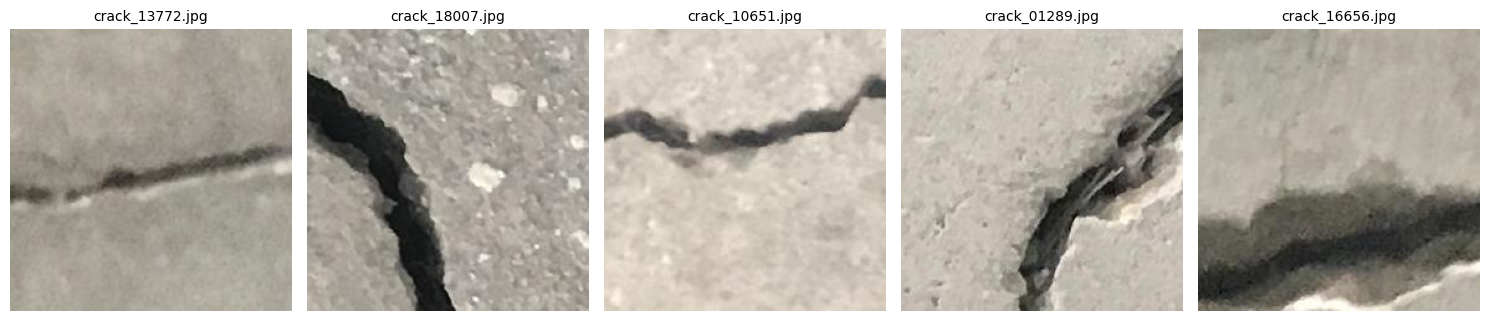

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Path to your unlabelled image directory
folder = unlabelled_dir

# Get all 'crack' image paths with correct extensions
crack_images = [
    f for f in os.listdir(folder)
    if f.lower().startswith("crack") and f.lower().endswith((".jpg", ".jpeg", ".png"))
]

# Shuffle and pick a few
random.shuffle(crack_images)
num_to_display = min(5, len(crack_images))  # Show up to 5
selected_images = crack_images[:num_to_display]

# Plot the selected images with actual file names
plt.figure(figsize=(15, 5))
for i, filename in enumerate(selected_images):
    img_path = os.path.join(folder, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    plt.subplot(1, num_to_display, i + 1)
    plt.imshow(img)
    plt.title(filename, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()


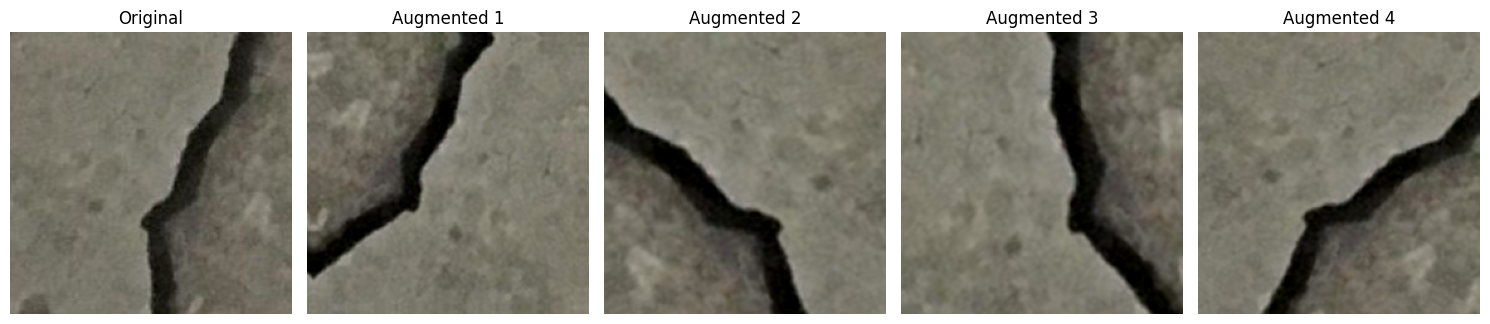

In [ ]:
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/unlabelled/crack_06529.jpg"  # adjust filename as needed
img_raw = tf.io.read_file(image_path)
img = tf.image.decode_image(img_raw, channels=3)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, [224, 224])

# 3) Instantiate the augmenter
augmenter = get_simclr_augmenter()

# 4) Generate a few augmented “views”
views = [augmenter(tf.expand_dims(img, 0))[0] for _ in range(4)]

# 5) Plot original + augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(img.numpy())
axes[0].set_title("Original")
axes[0].axis("off")

for i, view in enumerate(views, start=1):
    axes[i].imshow(view.numpy())
    axes[i].set_title(f"Augmented {i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# * *Step 2*: **Load Your Unlabelled Dataset and Apply the Augmentations**

In [ ]:
import tensorflow as tf
import os

def load_unlabelled_dataset(unlabelled_dir, batch_size=128):
    # List all image files
    filepaths = [os.path.join(unlabelled_dir, fname)
                 for fname in os.listdir(unlabelled_dir)
                 if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

    dataset = tf.data.Dataset.from_tensor_slices(filepaths)

    # Load and decode images (inside function!)
    def load_image(path):
        img_bytes = tf.io.read_file(path)

        # Get file extension
        ext = tf.strings.split(path, ".")[-1]
        ext = tf.strings.lower(ext)

        def decode_jpeg(): return tf.image.decode_jpeg(img_bytes, channels=3)
        def decode_png():  return tf.image.decode_png(img_bytes, channels=3)

        # Choose decoder based on extension
        img = tf.cond(
            tf.logical_or(tf.equal(ext, "jpg"), tf.equal(ext, "jpeg")),
            decode_jpeg,
            decode_png
        )

        # Normalize and resize
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, [224, 224])
        return img

    # ✅ Make sure augmenter is inside function too
    augmenter = get_simclr_augmenter()

    # Applied two augmentations to each image
    def apply_augmentations(img_path):
        img = load_image(img_path)
        img.set_shape([224, 224, 3])
        view1 = augmenter(img)
        view2 = augmenter(img)
        return view1, view2

    # Build the pipeline
    dataset = dataset.shuffle(10000)
    dataset = dataset.map(apply_augmentations, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return dataset  #



In [43]:
def get_cranet_encoder():
    return tf.keras.Model(
        inputs=cranet_light.input,
        outputs=cranet_light.get_layer("Dense1").output,
        name="cranet_encoder"
    )

In [44]:
print(cranet_light.input)  # should print a KerasTensor
print(cranet_light.get_layer("Dense1").output)

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=img>
<KerasTensor shape=(None, 512), dtype=float32, sparse=False, name=keras_tensor_214>


In [11]:
cranet_light.summary()

Model: "cranet_light"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)    │ (None, 224, 224,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1-1 (Conv2D)    │ (None, 224, 224,  │        896 │ img[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1-2 (Conv2D)    │ (None, 224, 224,  │      9,248 │ Conv1-1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 112, 112,  │          0 │ Conv1-2[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ pool1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ pool1[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 1, 32)  │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 1, 1, 32)  │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1, 1, 4)   │        132 │ reshape[0][0],    │
│                     │                   │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1, 1, 32)  │        160 │ dense[0][0],      │
│                     │                   │            │ dense[1][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1, 1, 32)  │          0 │ dense_1[0][0],    │
│                     │                   │            │ dense_1[1][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1, 1, 32)  │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 112, 112,  │          0 │ pool1[0][0],      │
│                     │ 32)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 112, 112,  │          0 │ multiply[0][0]    │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 112, 112,  │          0 │ multiply[0][0]    │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 112, 112,  │          0 │ lambda[0][0],     │
│ (Concatenate)       │ 2)                │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │         98 │ concatenate[0][0] │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 51,937,348 (198.13 MB)

 Trainable params: 51,937,348 (198.13 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
encoder = get_cranet_encoder()
encoder.summary()

Model: "cranet_encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)    │ (None, 224, 224,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1-1 (Conv2D)    │ (None, 224, 224,  │        896 │ img[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1-2 (Conv2D)    │ (None, 224, 224,  │      9,248 │ Conv1-1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 112, 112,  │          0 │ Conv1-2[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ pool1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ pool1[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 1, 1, 32)  │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 1, 1, 32)  │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1, 1, 4)   │        132 │ reshape_2[0][0],  │
│                     │                   │            │ reshape_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1, 1, 32)  │        160 │ dense_2[0][0],    │
│                     │                   │            │ dense_2[1][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 1, 1, 32)  │          0 │ dense_3[0][0],    │
│                     │                   │            │ dense_3[1][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 1, 1, 32)  │          0 │ add_1[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 112, 112,  │          0 │ pool1[0][0],      │
│ (Multiply)          │ 32)               │            │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ channel_mean        │ (None, 112, 112,  │          0 │ multiply_1[0][0]  │
│ (ChannelMean)       │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ channel_max         │ (None, 112, 112,  │          0 │ multiply_1[0][0]  │
│ (ChannelMax)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 112, 112,  │          0 │ channel_mean[0][… │
│ (Concatenate)       │ 2)                │            │ channel_max[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │         98 │ concatenate[0][0] │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 51,673,666 (197.12 MB)

 Trainable params: 51,673,666 (197.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def build_simclr_model(encoder, projection_dim=128):
    inputs = tf.keras.Input(shape=(224, 224, 3))

    features = encoder(inputs)  # From cranet encoder
    x = tf.keras.layers.Dense(512, activation='relu')(features)
    outputs = tf.keras.layers.Dense(projection_dim)(x)  # No activation

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="simclr_model")
    return model

In [ ]:
simclr_model = build_simclr_model(encoder)
simclr_model.summary()

Model: "simclr_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cranet_encoder (Functional)     │ (None, 512)            │    51,673,666 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        65,664 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,001,986 (198.37 MB)

 Trainable params: 52,001,986 (198.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

def nt_xent_loss(z_i, z_j, temperature=0.5):
    """
    SimCLR NT-Xent Loss for one batch of embeddings
    z_i: Tensor (batch_size, projection_dim)
    z_j: Tensor (batch_size, projection_dim)
    """
    batch_size = tf.shape(z_i)[0]
    z = tf.concat([z_i, z_j], axis=0)  # shape: (2N, D)

    # Normalize embeddings
    z = tf.math.l2_normalize(z, axis=1)

    # Cosine similarity matrix: sim(i,j)
    sim_matrix = tf.matmul(z, z, transpose_b=True)  # shape: (2N, 2N)

    # Scale by temperature
    sim_matrix = sim_matrix / temperature

    # Create mask to filter out similarity with itself
    mask = tf.eye(2 * batch_size)
    sim_matrix = sim_matrix * (1 - mask) - 1e9 * mask  # set diagonal to -inf

    # Positive pair indices
    positives = tf.range(batch_size)
    positive_indices = positives + batch_size

    labels = tf.concat([positive_indices, positives], axis=0)

    # Cross entropy loss
    loss = tf.keras.losses.sparse_categorical_crossentropy(
        labels, sim_matrix, from_logits=True
    )

    return tf.reduce_mean(loss)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [ ]:
def train_simclr(model, dataset, optimizer, epochs=20, temperature=0.5):
    for epoch in range(1, epochs + 1):
        total_loss = 0.0
        num_batches = 0
  # view 1 and view 2 are 2 augmentations of same image
        for step, (view1, view2) in enumerate(dataset):
            with tf.GradientTape() as tape:
                z1 = model(view1, training=True)
                z2 = model(view2, training=True)
                loss = nt_xent_loss(z1, z2, temperature)

            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            total_loss += loss
            num_batches += 1

            if step % 20 == 0:
                print(f"Step {step:04d} — Loss: {loss:.4f}")

        avg_loss = total_loss / num_batches
        print(f"\n🔥 Epoch {epoch}/{epochs} — Avg Loss: {avg_loss:.4f}\n")

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [ ]:
train_ds = load_unlabelled_dataset(unlabelled_dir, batch_size=128)

In [ ]:
print("dataset :",type(train_ds))

dataset : <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
train_simclr(simclr_model, train_ds, optimizer, epochs=10)


Step 0000 — Loss: 5.5359
Step 0020 — Loss: 5.4084
Step 0040 — Loss: 5.5413
Step 0060 — Loss: 5.5413
Step 0080 — Loss: 5.5413
Step 0100 — Loss: 5.5413


In [ ]:
!nvidia-smi

# Implementing BYOL

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as nn
from torchvision import transforms
import copy

In [ ]:
import torch.nn.functional as F
print(dir(F))


['BroadcastingList1', 'BroadcastingList2', 'BroadcastingList3', 'Callable', 'DType', 'GRID_SAMPLE_INTERPOLATION_MODES', 'GRID_SAMPLE_PADDING_MODES', 'List', 'Optional', 'TYPE_CHECKING', 'Tensor', 'Tuple', 'Union', '_Reduction', '_VF', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_adaptive_max_pool1d', '_adaptive_max_pool2d', '_adaptive_max_pool3d', '_add_docstr', '_canonical_mask', '_check_key_padding_mask', '_fractional_max_pool2d', '_fractional_max_pool3d', '_get_softmax_dim', '_in_projection', '_in_projection_packed', '_infer_size', '_is_integer', '_list_with_default', '_max_pool1d', '_max_pool2d', '_max_pool3d', '_mha_shape_check', '_no_grad_embedding_renorm_', '_none_or_dtype', '_overload', '_pair', '_single', '_sym_int', '_threshold', '_triple', '_unpool_output_size', '_verify_batch_size', '_verify_spatial_size', 'adaptive_avg_pool1d', 'adaptive_avg_pool2d', 'adaptive_avg_pool3d', 'adaptive_max_pool1d', 'adaptive_max_p

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class MLPHead(nn.Module):
    def __init__(self, in_dim, hidden_dim=4096, out_dim=256):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_dim, out_dim)
        )

    def forward(self, x):
        return self.net(x)



In [ ]:
class BYOL(nn.Module): # TARGET NETWORK LEARNS FROM ONLINE NETWORK
    def __init__(self, base_encoder, feature_dim=512, projection_dim=256):
        super().__init__()
        # predictor so that online network learns easily whats going on
        self.online_encoder = base_encoder()
        self.online_projector = MLPHead(in_dim=feature_dim, out_dim=projection_dim)
        self.predictor = MLPHead(in_dim=projection_dim, out_dim=projection_dim)

        self.target_encoder = copy.deepcopy(self.online_encoder)
        self.target_projector = copy.deepcopy(self.online_projector)

        for param in self.target_encoder.parameters():
            param.requires_grad = False
        for param in self.target_projector.parameters():
            param.requires_grad = False

    @torch.no_grad()
    def _update_target_network(self, beta=0.99):
        for param_o, param_t in zip(self.online_encoder.parameters(), self.target_encoder.parameters()):
            param_t.data = beta * param_t.data + (1 - beta) * param_o.data

        for param_o, param_t in zip(self.online_projector.parameters(), self.target_projector.parameters()):
            param_t.data = beta * param_t.data + (1 - beta) * param_o.data

    def forward(self, x1, x2):
        z1 = self.online_projector(self.online_encoder(x1))
        z2 = self.online_projector(self.online_encoder(x2))

        p1 = self.predictor(z1)
        p2 = self.predictor(z2)

        with torch.no_grad():
            t1 = self.target_projector(self.target_encoder(x1))
            t2 = self.target_projector(self.target_encoder(x2))

        loss1 = F.mse_loss(p1, t2.detach())
        loss2 = F.mse_loss(p2, t1.detach())

        return loss1 + loss2


In [ ]:
# import torch.nn as nn
# import torch.nn.functional as F

# class Model(nn.Module):
#     (self) -> None:
#         super().__init__()
#         self.conv1 = nn.Conv2d(1, 20, 5)
#         self.conv2 = nn.Conv2d(20, 20, 5)

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         return F.relu(self.conv2(x))

# AUGMENTATIONS

In [ ]:
from torchvision import transforms

crack_aware_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.7, 1.0)),  # simulate zoom-in for small cracks
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3)], p=0.5),  # simulate defocus
    transforms.ColorJitter(brightness=0.3, contrast=0.3),  # simulate uneven lighting
    transforms.RandomApply([transforms.RandomAffine(
        degrees=5,
        translate=(0.1, 0.1),
        scale=(0.95, 1.05),
        shear=5
    )], p=0.7),  # simulate edge/crack angle shifts
    transforms.RandomGrayscale(p=0.2),  # enforce shape-awareness
    transforms.RandomHorizontalFlip(),  # crack mirroring (optional)
    transforms.RandomVerticalFlip(),    # optional for vertical cracks
    transforms.ToTensor()
])

# DATA LOADER

In [ ]:
from torch.utils.data import Dataset

class BYOLCrackDataset(Dataset):
    def __init__(self, image_dataset, transform):
        """
        image_dataset: your base dataset (e.g., ImageFolder or custom crack dataset)
        transform: the transformation that returns (view1, view2)
        """
        self.dataset = image_dataset
        self.transform = transform

    def __getitem__(self, idx):
        image, _ = self.dataset[idx]  # Ignore label if it's there
        view1, view2 = self.transform(image)
        return view1, view2

    def __len__(self):
        return len(self.dataset)


In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import os

class CrackImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, f)
                            for f in os.listdir(image_dir)
                            if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            return self.transform(img)
        else:
            return img


In [ ]:

crack_images = CrackImageDataset(
    image_dir= unlabelled_dir,
    transform=CrackPairView(crack_aware_transform)
)

dataset = BYOLCrackDataset(crack_images, transform=lambda x: x)  # x is already (view1, view2)


In [ ]:
class CrackPairView:
    def __init__(self, base_transform):
        self.base_transform = base_transform

    def __call__(self, img):
        return self.base_transform(img), self.base_transform(img)

# ✅ 3. Create the transform that returns two views
pair_transform = CrackPairView(crack_aware_transform)

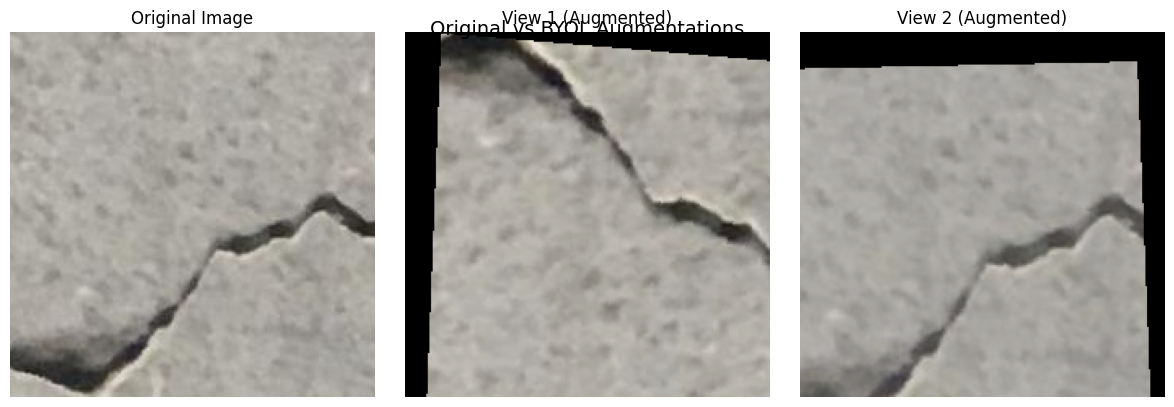

In [ ]:
image_dir = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/unlabelled"
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().startswith("crack") and f.lower().endswith((".jpg", ".jpeg", ".png"))]
img_path = random.choice(image_paths)

img = Image.open(img_path).convert("RGB")
view1, view2 = pair_transform(img)

# ✅ 4. VisualiZING BOTH VIEWS
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(view1.permute(1, 2, 0))
ax[1].set_title("View 1 (Augmented)")
ax[1].axis("off")

ax[2].imshow(view2.permute(1, 2, 0))
ax[2].set_title("View 2 (Augmented)")
ax[2].axis("off")

plt.tight_layout()
plt.suptitle("Original vs BYOL Augmentations", fontsize=14)
plt.show()

# Training BYOL model

In [ ]:
from torch import optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BYOL(base_encoder= encoder, feature_dim=512, projection_dim=256).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 100
ema_decay = 0.996

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for view1, view2 in train_loader:
        view1, view2 = view1.to(device), view2.to(device)

        loss = model(view1, view2)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        model._update_target_network(beta=ema_decay)

    avg_loss = total_loss / len(train_loader)
    print(f"[Epoch {epoch+1}] BYOL Loss: {avg_loss:.4f}")


# USE TENSFORFLOW TO KEEP VERSIONS ALLRIGHT

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models
# import tensorflow_addons as tfa
import numpy as np

from tqdm import tqdm
import os
import random

# Code: Projection MLP

In [46]:
def build_projection_mlp(input_dim, hidden_dim=4096, output_dim=256):
    return models.Sequential([
        layers.Dense(hidden_dim, use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dense(output_dim)
    ], name="projection_head")


# Prediction MLP

In [47]:
def build_prediction_mlp(input_dim=256, hidden_dim=4096, output_dim=256):
    return models.Sequential([
        layers.Dense(hidden_dim, use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dense(output_dim)
    ], name="prediction_head")


# CHECK

In [48]:
encoder = get_cranet_encoder()
projector = build_projection_mlp(input_dim=512)
predictor = build_prediction_mlp()

In [49]:
class BYOL(tf.keras.Model):
    def __init__(self, encoder, projection_dim=256, hidden_dim=4096, ema_decay=0.996):
        super(BYOL, self).__init__()

        # Online network
        self.online_encoder = encoder
        self.online_projector = build_projection_mlp(input_dim=512, hidden_dim=hidden_dim, output_dim=projection_dim)
        self.online_predictor = build_prediction_mlp(input_dim=projection_dim, hidden_dim=hidden_dim, output_dim=projection_dim)

        # Target network (clone of online at init)
        self.target_encoder = tf.keras.models.clone_model(encoder)
        self.target_projector = build_projection_mlp(input_dim=512, hidden_dim=hidden_dim, output_dim=projection_dim)

        self.ema_decay = ema_decay
        self._init_target_weights()

    def _init_target_weights(self):
        for online_var, target_var in zip(self.online_encoder.weights + self.online_projector.weights,
                                          self.target_encoder.weights + self.target_projector.weights):
            target_var.assign(online_var)

    def update_target_weights(self):
        for online_var, target_var in zip(self.online_encoder.weights + self.online_projector.weights,
                                          self.target_encoder.weights + self.target_projector.weights):
            target_var.assign(self.ema_decay * target_var + (1 - self.ema_decay) * online_var)

    def call(self, view1, view2):
        # Online
        proj_online_v1 = self.online_projector(self.online_encoder(view1))
        pred_online_v1 = self.online_predictor(proj_online_v1)

        proj_online_v2 = self.online_projector(self.online_encoder(view2))
        pred_online_v2 = self.online_predictor(proj_online_v2)

        # Target (no gradients)
        proj_target_v1 = self.target_projector(self.target_encoder(view1))
        proj_target_v2 = self.target_projector(self.target_encoder(view2))

        return pred_online_v1, proj_target_v2, pred_online_v2, proj_target_v1


In [50]:
def byol_loss_fn(p, z):
    # Normalize both vectors
    p = tf.math.l2_normalize(p, axis=1)
    z = tf.math.l2_normalize(z, axis=1)

    # Cosine similarity, then convert to loss
    return 2 - 2 * tf.reduce_mean(tf.reduce_sum(p * z, axis=1))

In [18]:
!pip install 'tensorflow_addons'


# Augmentations

In [51]:
import tensorflow as tf
import os
import numpy as np
from PIL import Image

def crack_augment(image):
    image = tf.image.resize(image, [256, 256])

    # 1. Random crop + resize back (simulate cracks on edges)
    crop_size = tf.random.uniform([], 200, 256, dtype=tf.int32)
    image = tf.image.random_crop(image, size=[crop_size, crop_size, 3])
    image = tf.image.resize(image, [224, 224])

    # 2. Brightness & Contrast (simulate light cracks)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, 0.6, 1.4)

    # 3. Random flips & 90° rotations
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    k = tf.random.uniform([], 0, 4, dtype=tf.int32)
    image = tf.image.rot90(image, k)

    # 4. Normalize to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image

def get_augmented_pair(image):
    return crack_augment(image), crack_augment(image)

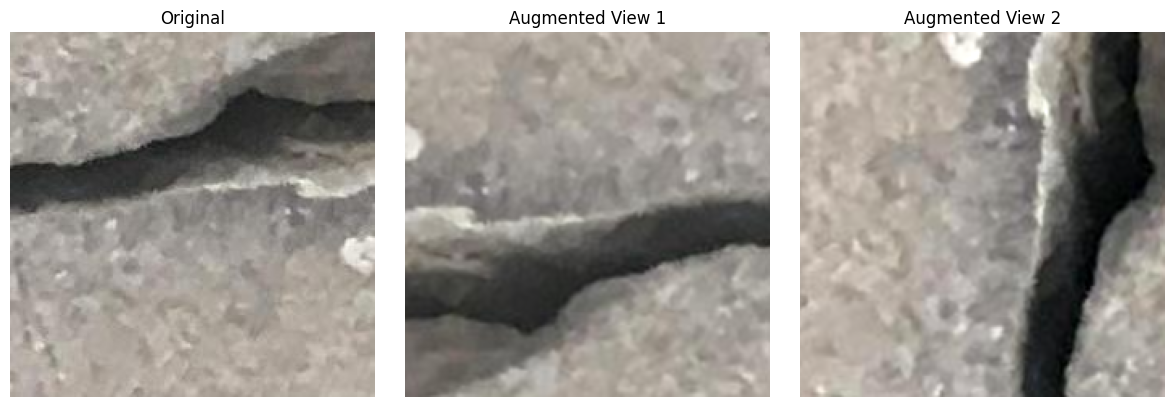

In [52]:
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
import tensorflow as tf

# Define your unlabelled directory
unlabelled_dir = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/unlabelled"

# Get crack images
crack_image_paths = [os.path.join(unlabelled_dir, f)
                     for f in os.listdir(unlabelled_dir)
                     if f.lower().startswith("crack") and f.lower().endswith((".jpg", ".jpeg", ".png"))]

# Pick a random crack image
img_path = random.choice(crack_image_paths)

# Load and convert image to tensor
img = Image.open(img_path).convert("RGB")
img_tensor = tf.convert_to_tensor(np.array(img), dtype=tf.uint8)

# Get two augmented views
view1, view2 = get_augmented_pair(img_tensor)

# Plot original and both augmented views
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(view1.numpy())
plt.title("Augmented View 1")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(view2.numpy())
plt.title("Augmented View 2")
plt.axis("off")

plt.tight_layout()
plt.show()

# **Data Loader**

In [53]:
class CrackUnlabeledDataset(tf.keras.utils.Sequence):
    def __init__(self, image_dir, batch_size=32):
        self.image_paths = [os.path.join(image_dir, f)
                            for f in os.listdir(image_dir)
                            if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        self.batch_size = batch_size

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_paths = self.image_paths[idx * self.batch_size : (idx + 1) * self.batch_size]
        view1_batch, view2_batch = [], []

        for path in batch_paths:
            img = Image.open(path).convert("RGB")
            img = tf.convert_to_tensor(np.array(img), dtype=tf.uint8)
            view1, view2 = get_augmented_pair(img)
            view1_batch.append(view1)
            view2_batch.append(view2)

        return tf.stack(view1_batch), tf.stack(view2_batch)

In [54]:
dataset = CrackUnlabeledDataset(image_dir= unlabelled_dir, batch_size=32)
view1_batch, view2_batch = dataset[0]


In [21]:
print(view1_batch.shape)

(32, 224, 224, 3)


In [21]:
dummy = tf.random.normal((1, 224, 224, 3))
print("Encoder output shape:", encoder(dummy).shape)

Encoder output shape: (1, 512)


In [55]:
from keras.saving import register_keras_serializable  # for TF >= 2.13

@register_keras_serializable()
def compute_avg(x):
    return tf.reduce_mean(x, axis=3, keepdims=True)

@register_keras_serializable()
def compute_max(x):
    return tf.reduce_max(x, axis=3, keepdims=True)

In [56]:
encoder = get_cranet_encoder()
model = BYOL(encoder, projection_dim=256)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [57]:
# @tf.function
def train_step(model, view1, view2, optimizer):
    with tf.GradientTape() as tape:
        pred1, target2, pred2, target1 = model(view1, view2)
        print("pred1 mean:", tf.reduce_mean(pred1).numpy())
        print("target2 mean:", tf.reduce_mean(target2).numpy())
        print("pred2 mean:", tf.reduce_mean(pred2).numpy())
        print("target1 mean:", tf.reduce_mean(target1).numpy())
        print("pred1 shape:", pred1.shape, "target2 shape:", target2.shape)
        loss1 = byol_loss_fn(pred1, tf.stop_gradient(target2))
        loss2 = byol_loss_fn(pred2, tf.stop_gradient(target1))
        print("Loss1:", loss1.numpy(), "Loss2:", loss2.numpy())
        loss = tf.reduce_mean(loss1 + loss2)

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    model.update_target_weights()

    return loss

In [ ]:
from tqdm.notebook import tqdm

# Setup
unlabeled_dir = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/unlabelled"
dataset = CrackUnlabeledDataset(unlabeled_dir, batch_size=16)

epochs = 2

for epoch in range(epochs):
    print(f"\n🔁 Epoch {epoch+1}/{epochs}")
    total_loss = 0.0
    pbar = tqdm(range(len(dataset)), desc="Training")

    for i in pbar:
        view1, view2 = dataset[i]

        # Ensure proper type/shape
        view1 = tf.convert_to_tensor(view1, dtype=tf.float32)
        view2 = tf.convert_to_tensor(view2, dtype=tf.float32)

        loss = train_step(model, view1, view2, optimizer)
        total_loss += loss.numpy()

        pbar.set_postfix({"Loss": f"{loss.numpy():.4f}"})

    avg_loss = total_loss / len(dataset)
    print(f"✅ Epoch {epoch+1} Avg Loss: {avg_loss:.4f}")



🔁 Epoch 1/2


Training:   0%|          | 0/1423 [00:00<?, ?it/s]

pred1 mean: -1.114506e-06
target2 mean: 5.575455e-06
pred2 mean: -1.142715e-06
target1 mean: 5.521767e-06
pred1 shape: (16, 256) target2 shape: (16, 256)
Loss1: 1.9190662 Loss2: 1.925248


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['Conv1-1/kernel', 'Conv1-1/bias', 'Conv1-2/kernel', 'Conv1-2/bias', 'dense_18/kernel', 'dense_18/bias', 'dense_19/kernel', 'dense_19/bias', 'conv2d_3/kernel', 'Conv2-1/kernel', 'Conv2-1/bias', 'Conv2-2/kernel', 'Conv2-2/bias', 'dense_20/kernel', 'dense_20/bias', 'dense_21/kernel', 'dense_21/bias', 'conv2d_4/kernel', 'Conv3-1/kernel', 'Conv3-1/bias', 'Conv3-2/kernel', 'Conv3-2/bias', 'dense_22/kernel', 'dense_22/bias', 'dense_23/kernel', 'dense_23/bias', 'conv2d_5/kernel', 'Dense1/kernel', 'Dense1/bias', 'byol_1/projection_head/dense_32/kernel', 'byol_1/projection_head/batch_normalization_9/gamma', 'byol_1/projection_head/batch_normalization_9/beta', 'byol_1/projection_head/dense_33/kernel', 'byol_1/projection_head/dense_33/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Streaming output truncated to the last 5000 lines.
target2 mean: 0.64749396
pred2 mean: 10.324873
target1 mean: 0.6454992
pred1 shape: (16, 256) target2 shape: (16, 256)
Loss1: 1.3113022e-06 Loss2: 1.4305115e-06
pred1 mean: 10.797934
target2 mean: 0.674873
pred2 mean: 10.80444
target1 mean: 0.6744548
pred1 shape: (16, 256) target2 shape: (16, 256)
Loss1: 1.4305115e-06 Loss2: 1.4305115e-06
pred1 mean: 10.791035
target2 mean: 0.67786574
pred2 mean: 10.770775
target1 mean: 0.6790644
pred1 shape: (16, 256) target2 shape: (16, 256)
Loss1: 1.1920929e-06 Loss2: 1.0728836e-06
pred1 mean: 10.862558
target2 mean: 0.6811197
pred2 mean: 10.84369
target1 mean: 0.6822654
pred1 shape: (16, 256) target2 shape: (16, 256)
Loss1: 8.34465e-07 Loss2: 9.536743e-07
pred1 mean: 10.676441
target2 mean: 0.6711139
pred2 mean: 10.607601
target1 mean: 0.67553246
pred1 shape: (16, 256) target2 shape: (16, 256)
Loss1: 4.7683716e-07 Loss2: 4.7683716e-07
pred1 mean: 10.90815
target2 mean: 0.68520564
pred2 mean: 10.847

Training:   0%|          | 0/1423 [00:00<?, ?it/s]

pred1 mean: 15.364217
target2 mean: 1.3977739
pred2 mean: 15.334762
target1 mean: 1.4003266
pred1 shape: (16, 256) target2 shape: (16, 256)
Loss1: 1.7881393e-06 Loss2: 1.9073486e-06
pred1 mean: 15.047085
target2 mean: 1.3724331
pred2 mean: 15.046308
target1 mean: 1.3725052
pred1 shape: (16, 256) target2 shape: (16, 256)
Loss1: 1.9073486e-06 Loss2: 1.9073486e-06
pred1 mean: 15.12326
target2 mean: 1.3800788
pred2 mean: 15.132183
target1 mean: 1.3791778
pred1 shape: (16, 256) target2 shape: (16, 256)
Loss1: 2.1457672e-06 Loss2: 2.1457672e-06
pred1 mean: 14.696571
target2 mean: 1.3429266
pred2 mean: 14.717224
target1 mean: 1.3410945
pred1 shape: (16, 256) target2 shape: (16, 256)
Loss1: 2.1457672e-06 Loss2: 2.1457672e-06
pred1 mean: 15.4540415
target2 mean: 1.4096847
pred2 mean: 15.457314
target1 mean: 1.4093878
pred1 shape: (16, 256) target2 shape: (16, 256)
Loss1: 2.3841858e-06 Loss2: 2.3841858e-06
pred1 mean: 15.34034
target2 mean: 1.3998969
pred2 mean: 15.340189
target1 mean: 1.39991
p